## Modellering av smittespredning

I denne pylab-filen skal jeg utforske litt ulike måter å modellere smittespredning i en befolkning. Det vil skje en utvikling i hvor avansert
programmet er, ettersom det blir flere parametere å ta med i beregning. Modellene vil bli mer og mer forståelige for hvordan vi opplever smitte. 

På [UiO sine nettsider](https://realprog.no/docs/tema5_modellering/modelleringsprosjekt_smitte.html) uttrykkes den minst avanserte formelen for smittetallet i en befolkning som: I_t+1 = I_t + a*I_t.

Fra nå av kommer jeg til å omtale 'Antall smittede i en befolkning' som I, bare for å gjøre det raskere. Formelen fra UiO kan forklares som at I er lik I fra forrige uke, pluss I fra forrige uke ganget med en vekstfaktor. Det er denne vekstfaktoren eller a som den uttrykkes som i formelen, som avgjør hvor fort sykdommen sprer seg.

Vi får også en funksjon for den deriverte av I, altså hvor stor stigningen til I er. Denne er uttrykt som I'(t) = a*I(t)

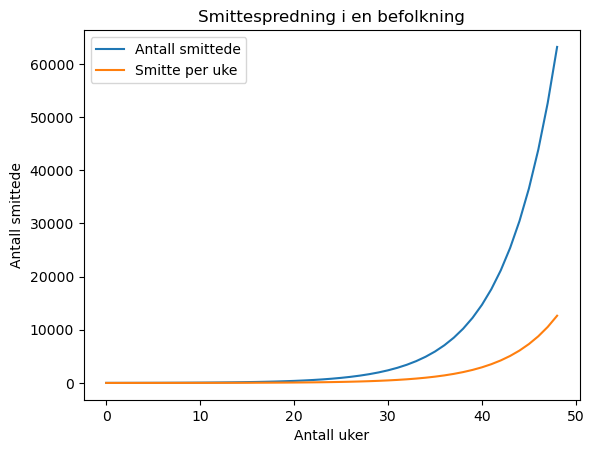

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Definerer startverdier
t = np.arange(0,49)
I = [10]
a = 0.2
vI = [a*I[0]] # Dette er I'(t)

# For-løkke for å regne ut nye verdier av I og vI
for i in range(1,len(t)):
    I.append(I[i-1] + I[i-1]*a)
    vI.append(I[i]*a)
    
# Plotter dataen som grafer og pynter litt
plt.plot(t,I, label = 'Antall smittede')
plt.plot(t,vI,label = 'Smitte per uke')
plt.title('Smittespredning i en befolkning')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend();

Her observerer jeg at vi får en eksponentiell graf for antall smittede. Det er ingenting som begrenser veksten av sykdommen så den fortsetter bare å stige. Den tar ikke henhold til hvor mange som kan bli smittet eller som er blitt immune. Allikevel kan den kanskje bli brukt i noen få scenarioer. Kanskje hvis smitten skjer veldig fort, befolkningen er ufattelig stor og sykdommen varer veldig lenge.

Det neste vi kan undersøke er hvilke startverdier som har noe å si. Ved å endre a og startverdien for I mellom flere plot, kan vi 
undersøke innvirkningen de har på grafen. Under lager jeg en funksjon ut av det forrige programmet, for at det skal være lettere å 
lage mange plot med samme program.

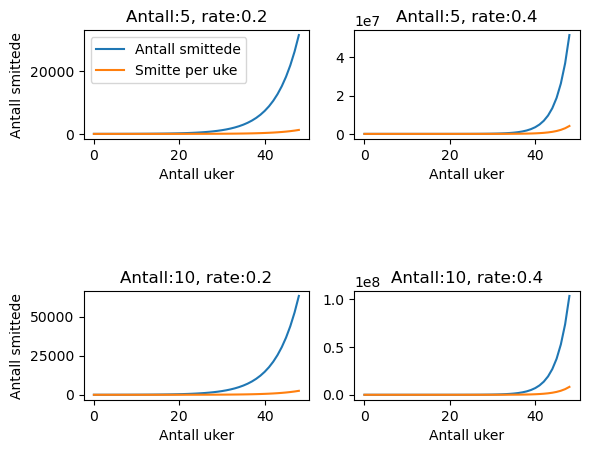

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate):
    I = [startmengde]
    vI = [startmengde*smitterate]
    t = np.arange(0,49)
    
    for i in range(1,len(t)):
        I.append(I[i-1] + I[i-1]*smitterate)
        vI.append(I[i]*smitterate)
    
    return I, vI

# Plotter i ulike subplots for å vise de vedsiden av hverandre
plt.subplot(3,2,1)
plt.plot(t,smitte(5,0.2)[0], label = 'Antall smittede')
plt.plot(t,smitte(1,0.2)[1],label = 'Smitte per uke')
plt.title('Antall:5, rate:0.2')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend()

plt.subplot(3,2,2)
plt.plot(t,smitte(5,0.4)[0], label = 'Antall smittede')
plt.plot(t,smitte(1,0.4)[1],label = 'Smitte per uke')
plt.xlabel('Antall uker')
plt.title('Antall:5, rate:0.4')

plt.subplot(3,2,5)
plt.plot(t,smitte(10,0.2)[0], label = 'Antall smittede')
plt.plot(t,smitte(2,0.2)[1],label = 'Smitte per uke')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.title('Antall:10, rate:0.2')

plt.subplot(3,2,6)
plt.plot(t,smitte(10,0.4)[0], label = 'Antall smittede')
plt.plot(t,smitte(2,0.4)[1],label = 'Smitte per uke')
plt.xlabel('Antall uker')
plt.title('Antall:10, rate:0.4');

Her har jeg variert smitteraten og hvor mange som er smittet til å begynne med. Ved å endre hvor mange som er smittet til å begynne med, ser vi at det skjer en nesten proporsjonal endring. Dobbelt så mange smittede til å begynne med fører til nesten dobbelt så mange smittede i uke 48. Allikevel er den store endringen i å endre smitteraten. Ved å doble smitteraten kommer smittetallet etter 48 uker over 40 000 000 smittede, opp imot de 20 000 sykdommen med smitterate på halvparten smittet. At en sykdom med god evne til å smitte er best på å bre seg er ikke veldig overraskende, men det var overraskende stor forskjell.

### Mottakelige 
Nå skal formelen endres litt ved å legge inn en faktor for hvor mange som kan motta sykdommen. UiO skriver den nye formelen som:
I_t+1 = I_t + a*I_t*S_t

Funksjonen for den deriverte er nå: I'(t) = a*I(t)*S(t)

Denne er lik den forrige vi hadde, med unntak av at vi multipliserer endringen med en S-faktor. Denne skal endre seg over tid ettersom flere
blir smittet og færre kan motta sykdommen.

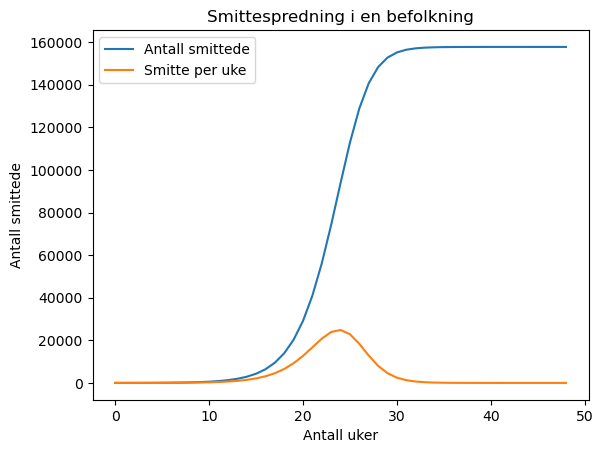

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate):
    # Alle startverdiene 
    I = [startmengde]
    vI = [startmengde*smitterate]
    startpop = 157759
    S = [startpop - I[0]]
    t = np.arange(0,49)
    
    # Regner ut I og vI for 48 uker
    for i in range(1,len(t)):
        S.append(157759 - I[i-1])
        n = S[i]/startpop
        I.append(I[i-1] + I[i-1]*smitterate*n)
        vI.append(I[i]*smitterate*n)
    
    return I, vI

# Plotter verdiene
plt.plot(t,smitte(10,0.5)[0], label = 'Antall smittede')
plt.plot(t,smitte(10,0.5)[1],label = 'Smitte per uke')
plt.title('Smittespredning i en befolkning')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend();

Her ser vi at grafen for antall smittede ser ut som en logistisk graf. Den flater ut når den nærmer seg befolkningsmengden. Vi ser også at toppunktet for vekstgrafen sammensvarer med vendepunktet i grafen for antall smittede. Forskjellen mellom dette og det forrige programmet kommer veldig godt frem, siden denne ikke vil overstige befolkningen, imens den andre går mot uendelig. 

I[23] = 74134.67185377474


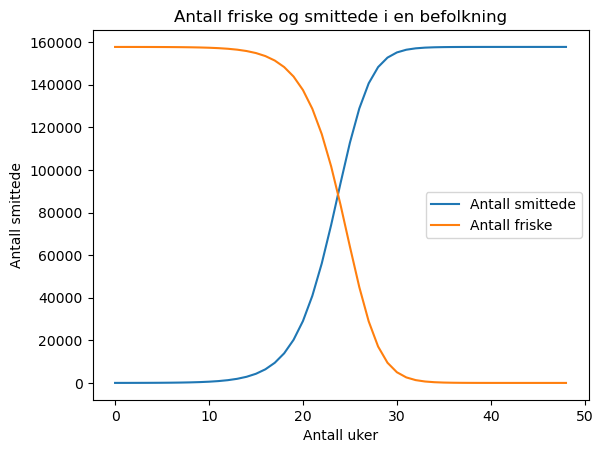

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate):
    # Alle startverdiene 
    I = [startmengde]
    vI = [startmengde*smitterate]
    startpop = 157759
    S = [startpop - I[0]]
    t = np.arange(0,49)
    
    # Regner ut I og S
    for i in range(1,len(t)):
        S.append(157759 - I[i-1])
        n = S[i]/startpop
        I.append(I[i-1] + I[i-1]*smitterate*n)
        vI.append(I[i]*smitterate*n)
    
    return I, S # Gir ut S istedenfor vI

# Plotter verdiene
plt.plot(t,smitte(10,0.5)[0], label = 'Antall smittede')
plt.plot(t,smitte(10,0.5)[1],label = 'Antall friske')
plt.title('Antall friske og smittede i en befolkning')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend();
print(f'I[23] =',smitte(10,0.5)[0][23]);

Det går også an å se utviklingen av smittede opp imot friske. Som forventet vil grafen med friske droppe ettersom grafen med smittede stiger. De møtes ved rundt 75000 mennesker som er midtpunktet og ligger rundt uke 23. Grafene følger en eksponensiell vekst, før de vender og flater ut, fordi befolkningstallet er maksgrensen smittede kan nå.

I[17] = 68091.85356379495
I[18] = 87442.8959912236


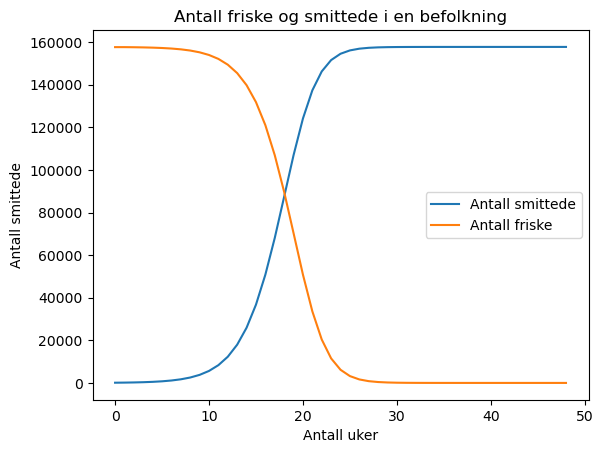

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate):
    # Alle startverdiene 
    I = [startmengde]
    vI = [startmengde*smitterate]
    startpop = 157759
    S = [startpop - I[0]]
    t = np.arange(0,49)
    
    # Regner ut I og S
    for i in range(1,len(t)):
        S.append(157759 - I[i-1])
        n = S[i]/startpop
        I.append(I[i-1] + I[i-1]*smitterate*n)
        vI.append(I[i]*smitterate*n)
    
    return I, S # Gir ut S istedenfor vI

# Plotter verdiene
plt.plot(t,smitte(100,0.5)[0], label = 'Antall smittede')
plt.plot(t,smitte(100,0.5)[1],label = 'Antall friske')
plt.title('Antall friske og smittede i en befolkning')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend();
print(f'I[17] =',smitte(100,0.5)[0][17])
print(f'I[18] =',smitte(100,0.5)[0][18]);

Ser at ved å øke antall smittede ved start, vil krysningspunktet oppstå tidligere og vi får full infeksjon tidligere også.

I[12] = 79656.56743604287


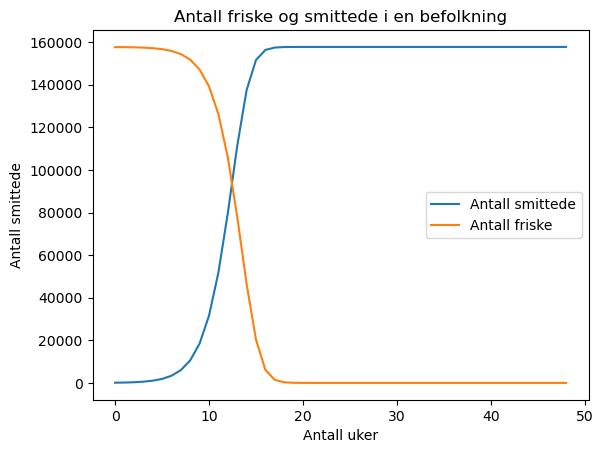

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate):
    # Alle startverdiene 
    I = [startmengde]
    vI = [startmengde*smitterate]
    startpop = 157759
    S = [startpop - I[0]]
    t = np.arange(0,49)
    
    # Regner ut I og S
    for i in range(1,len(t)):
        S.append(157759 - I[i-1])
        n = S[i]/startpop
        I.append(I[i-1] + I[i-1]*smitterate*n)
        vI.append(I[i]*smitterate*n)
    
    return I, S # Gir ut S istedenfor vI

# Plotter verdiene
plt.plot(t,smitte(100,0.8)[0], label = 'Antall smittede')
plt.plot(t,smitte(100,0.8)[1],label = 'Antall friske')
plt.title('Antall friske og smittede i en befolkning')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend();
print(f'I[12] =',smitte(100,0.8)[0][12]);

Ved å øke a kan vi få en graf som krummer skarpere og der krysningspunktet oppstår tidligere. Fra dette og oppgave 1, kan det tolkes
at a har en ganske stor innflytelse på grafen. Hvis vi tenker at denne grafen kunne modellert utviklingen på en sykdom kan den kunne bli brukt for å vite når halvparten og alle er smittet. Grafen mangler fortsatt muligheten for å modellere de som blir friske.

### Frisk som en fisk

For å kunne modelere at folk blir friske må formelen endres litt. Ved å legge til en variabel for de som blir friske kan vi modellere at en del av de som er smittet går over til å være friske.

Formelen uttrykkes nå som: I_t+1 = I_t + a*I_t*S_t - b*I_t,

Som tidligere vil I_t være forrige ukes antall smittede, a er raten de smittede multipliserer seg med, S er forholdet mellom de friske forrige uke og den originale befolkningen. b må være et tall som påvirker hvor mange av de syke som blir friske hver uke. Jeg antar at de som blir friske ikke kan bli syke igjen, ettersom immunforsvaret er forberedt mot denne sykdommen etter å ha hatt den.

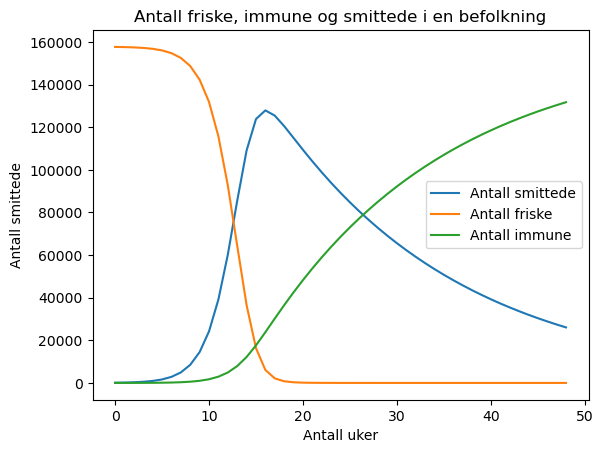

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate, bedringsrate): # Legger inn en bedringsrate
    # Alle startverdiene 
    I = [startmengde]
    vI = [startmengde*smitterate]
    startpop = 157759
    S = [startpop - I[0]]
    t = np.arange(0,49)
    R = [0]
    
    # Regner ut I, S og R
    for i in range(1,len(t)): # Skriver om på denne i forvente av neste steg
        I.append(I[i-1] + I[i-1]*smitterate*(S[i-1]/startpop) - bedringsrate*I[i-1]) # Trekker fra de som blir immune
        S.append(S[i-1] - I[i-1]*smitterate*(S[i-1]/startpop))
        R.append(R[i-1] + bedringsrate*I[i-1]) # Legger inn en bedringsrate 
        
        
    return I, S, R # Gir ut R i tillegg 

# Plotter verdiene
plt.plot(t,smitte(100,0.8,0.05)[0], label = 'Antall smittede')
plt.plot(t,smitte(100,0.8,0.05)[1],label = 'Antall friske')
plt.plot(t,smitte(100,0.8,0.05)[2],label = 'Antall immune')
plt.title('Antall friske, immune og smittede i en befolkning')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')
plt.legend();

Her observerer vi at ved å legge inn en bedringsrate endrer vi grafen ganske mye. Antall friske faller som vi så tidligere, men antall smittede når ikke befolkningsmengden. Her ser vi at folk begynner å bli friske og antall smittede faller ettersom flere og flere blir friske. Vi ser det ikke her, men antall immune vil etterhvert nå maks ettersom alle går igjennom å være syke.

### Vaksinering
Neste steg kan være å legge inn en mulighet for at folk vaksinerer seg. Hvis vi vil legge inn en vaksine må vi få en måte å hindre folk i å bli smittet. Dette kan vi gjøre ved å å si at en del av den usmittede befolkningen tar en vaksine og blir immun hver uke. På denne måten vil de "hoppe rundt" smittede-stadiet og gå fra frisk til immun.

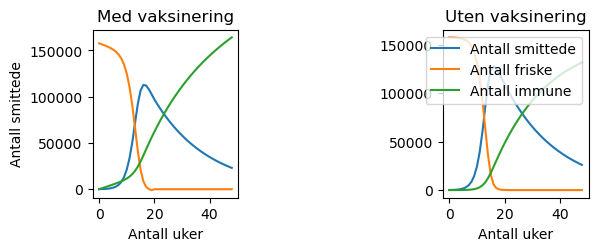

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Funksjon for å regne smitte og veksten av smitte
def smitte(startmengde, smitterate, bedringsrate, vaksineringsrate): # Legger inn en vaksineringsrate
    # Alle startverdiene 
    I = [startmengde]
    vI = [startmengde*smitterate]
    startpop = 157759
    S = [startpop - I[0]]
    t = np.arange(0,49)
    R = [0]
    
    # Regner ut I, S og R
    for i in range(1,len(t)): # Skriver om på denne i forvente av neste steg
        I.append(I[i-1] + I[i-1]*smitterate*(S[i-1]/startpop) - bedringsrate*I[i-1]) 
        if (S[i-1] - I[i-1]*smitterate*(S[i-1]/startpop)) > 0:
            S.append(S[i-1] - I[i-1]*smitterate*(S[i-1]/startpop) - vaksineringsrate) # Trekker fra de som blir immune
        else:
            S.append(0)
        R.append(R[i-1] + bedringsrate*I[i-1] + vaksineringsrate) # Legger inn en vaksineringsrate 
        
        
    return I, S, R # Gir ut R i tillegg 

# Plotter verdiene
plt.subplot(2,3,1)
plt.plot(t,smitte(100,0.8,0.05,1000)[0], label = 'Antall smittede')
plt.plot(t,smitte(100,0.8,0.05,1000)[1],label = 'Antall friske')
plt.plot(t,smitte(100,0.8,0.05,1000)[2],label = 'Antall immune')
plt.title('Med vaksinering')
plt.xlabel('Antall uker')
plt.ylabel('Antall smittede')


plt.subplot(2,3,3)
plt.plot(t,smitte(100,0.8,0.05,0)[0], label = 'Antall smittede')
plt.plot(t,smitte(100,0.8,0.05,0)[1],label = 'Antall friske')
plt.plot(t,smitte(100,0.8,0.05,0)[2],label = 'Antall immune')
plt.title('Uten vaksinering')
plt.xlabel('Antall uker')
#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# Skulle egentlig fikset noen spacing problemer med subplots, men det skjedde ingen endring
plt.legend();

Selv om det kanskje er litt vanskelig å se siden plottene er litt små, så er det en forskjell mellom at befolkningen vaksinerer seg. Det tydeligste er nok at antall immune stiger med en gang, istedenfor å bruke litt tid.

### Konklusjon og videre muligheter
Nå har vi et program som modelerer ganske bra hvordan en befolkning gjennomgår en sykdom. Den har parametere for bedrings-, smitte- og vaksine-rate. Det går an å bestemme hvor mange som starter med sykdommen for å undersøke innvirkningen dette har på spredning. Mulige videreføringer av dette kunne vært å legge inn noe som simulerer dødsfall, kanskje små variasjoner i de ulike ratene for å virke mer naturlig. Ulike mennesker blir påvirket ulikt av sykdommer så dette kan være et kult videre steg. Denne modellen er kanskje ikke realistisk, og det er vanskelig å anvende den for å simulere en ekte situasjon, men den gir en grunnleggende idé om hvordan det fungerer, og viser f.eks. hvor effektivt det er at noen få vaksinerer seg.